# Exploratory Data Analysis on the World Bank Data

The objective of this project is to collect data from the World Bank Open APIs and prepare and analyse the data using Python.

In [40]:
import pandas as pd
import numpy as np
import requests

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of this report is to first collect the data from the World Open Bank API and then prepare that dataset for analysis and visualization of some big countries among the world datasets. There are multiple indicators which has been chosen for the purpose of analysis. For example, Total Population, GDP ($), unemployment, electric power consumption, agriculture and some more. Following are the points of interest question for the purpose of analysis. From all the above indicators, some big countries which are selected for that are USA, Great Britain, China, Japan, Africa, Canada and India

# Analyse and Summarise the dataset

## Read the cleaned data from the CSV files

I have cleaned the file such that if the country is USA, save it in USA.csv to import it as a separate dataframe. Complete dataset of all the countries is also attached


In [41]:
# read the cleaned data from every CSV
try:
    df_cleaned_us=pd.read_csv('dataset/USA.csv')
    df_cleaned_in=pd.read_csv('dataset/India.csv')
    df_cleaned_cn=pd.read_csv('dataset/China.csv')
    df_cleaned_jp=pd.read_csv('dataset/Japan.csv')
    df_cleaned_ca=pd.read_csv('dataset/Canada.csv')
    df_cleaned_gb=pd.read_csv('dataset/Great Britain.csv')
    df_cleaned_za=pd.read_csv('dataset/South Africa.csv')
    print("Successfully read all the files")
except:
    # handling I/O exceptions
    print("Unexpected error in reading a file. Check the file path and if a file exists with the name given.")

# display data of one country to check if the cleaned data is loaded
print("Displaying data for USA: ")
display(df_cleaned_us.head())

# create a list of clean dataframes for further analysis
list_cleaned_df=[df_cleaned_us, df_cleaned_in, df_cleaned_cn, df_cleaned_jp, df_cleaned_ca, df_cleaned_gb, df_cleaned_za]

Successfully read all the files
Displaying data for USA: 


,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Year,Country
0,"326,838,199.0","165,118,706.0","161,719,493.0",11.6,8.7,12.0,19.9,1.4,0.8,8.8,3.9,"20,611,860,934,000.0",2.2,"294,163,000,000.0","189,744,559,000.0","10,318.0",10.1,89.3,2018,USA
1,"325,122,128.0","164,262,696.0","160,859,432.0",11.8,8.6,12.0,19.7,1.4,0.8,8.7,4.4,"19,542,979,183,000.0",2.0,"294,552,000,000.0","185,620,403,000.0","10,318.0",9.9,89.3,2017,USA
2,"323,071,755.0","163,245,938.0","159,825,817.0",12.2,8.5,12.0,19.8,1.4,0.8,8.7,4.9,"18,745,075,687,000.0",0.3,"231,944,000,000.0","176,951,430,000.0","10,318.0",9.5,89.3,2016,USA
3,"320,738,994.0","162,095,782.0","158,643,212.0",12.4,8.4,12.0,19.9,1.4,0.8,8.8,5.3,"18,238,300,569,000.0",2.7,"220,383,000,000.0","190,383,501,000.0","10,318.0",9.0,82.4,2015,USA
4,"318,386,329.0","160,946,434.0","157,439,895.0",12.5,8.2,12.0,20.0,1.4,0.7,8.9,6.2,"17,527,163,695,000.0",2.5,"235,226,000,000.0","207,796,973,000.0","12,994.0",9.2,83.1,2014,USA


## Prepare a combined DataFrame for further analysis

For each country, separate dataframes have been created. There may be cases when we may need the entire data across all countries in certain analysis. Hence it is a good idea to have a single combined dataframe ready.

In [42]:
combined_df=pd.concat(list_cleaned_df,sort=False)
combined_df.head(200)

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Year,Country
0,"326,838,199.0","165,118,706.0","161,719,493.0",11.6,8.7,12.0,19.9,1.4,0.8,8.8,3.9,"20,611,860,934,000.0",2.2,"294,163,000,000.0","189,744,559,000.0","10,318.0",10.1,89.3,2018,USA
1,"325,122,128.0","164,262,696.0","160,859,432.0",11.8,8.6,12.0,19.7,1.4,0.8,8.7,4.4,"19,542,979,183,000.0",2.0,"294,552,000,000.0","185,620,403,000.0","10,318.0",9.9,89.3,2017,USA
2,"323,071,755.0","163,245,938.0","159,825,817.0",12.2,8.5,12.0,19.8,1.4,0.8,8.7,4.9,"18,745,075,687,000.0",0.3,"231,944,000,000.0","176,951,430,000.0","10,318.0",9.5,89.3,2016,USA
3,"320,738,994.0","162,095,782.0","158,643,212.0",12.4,8.4,12.0,19.9,1.4,0.8,8.8,5.3,"18,238,300,569,000.0",2.7,"220,383,000,000.0","190,383,501,000.0","10,318.0",9.0,82.4,2015,USA
4,"318,386,329.0","160,946,434.0","157,439,895.0",12.5,8.2,12.0,20.0,1.4,0.7,8.9,6.2,"17,527,163,695,000.0",2.5,"235,226,000,000.0","207,796,973,000.0","12,994.0",9.2,83.1,2014,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,"126,843,000.0","64,552,936.0","62,290,064.0",9.4,7.7,9.0,31.4,5.1,5.6,21.6,4.8,"4,968,359,075,956.6",2.5,"71,875,507,467.6","75,413,745,586.5","8,299.4",3.8,80.7,2000,Japan
19,"126,631,000.0","64,416,945.0","62,214,055.0",9.3,7.8,9.0,31.9,5.2,5.8,22.1,4.7,"4,635,982,224,063.9",-1.1,"56,921,096,896.8","73,065,874,908.3","8,147.4",3.8,80.6,1999,Japan
20,"126,400,000.0","64,270,952.0","62,129,048.0",9.6,7.5,9.0,32.2,5.3,6.0,22.8,4.1,"4,098,362,709,531.2",-2.0,"50,613,687,910.3","65,708,569,477.3","8,004.0",4.0,79.4,1998,Japan
21,"126,057,000.0","64,068,675.0","61,988,325.0",9.5,7.3,9.0,33.3,5.4,6.0,24.2,3.4,"4,492,448,605,638.9",-0.1,"58,962,285,593.4","68,640,699,424.5","7,991.0",4.1,80.4,1997,Japan


## Descriptive Statistics

We can now analyse the data we have loaded. Descriptive statistics show the characteristics of numerical features. It gives information such as count, mean, mininum and maximum values etc. Hence we exclude the categorical features Year and Country from the combined DataFrame.

In [43]:
combined_df = pd.read_csv('dataset/worldbankindicatorsdatase.csv')
combined_df

,Unnamed: 0,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),...,Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Year,Country
0,0,"326,838,199.0","165,118,706.0","161,719,493.0",11.6,8.7,12.0,19.9,1.4,0.8,...,3.9,"20,611,860,934,000.0",2.2,"294,163,000,000.0","189,744,559,000.0","10,318.0",10.1,89.3,2018,USA
1,1,"325,122,128.0","164,262,696.0","160,859,432.0",11.8,8.6,12.0,19.7,1.4,0.8,...,4.4,"19,542,979,183,000.0",2.0,"294,552,000,000.0","185,620,403,000.0","10,318.0",9.9,89.3,2017,USA
2,2,"323,071,755.0","163,245,938.0","159,825,817.0",12.2,8.5,12.0,19.8,1.4,0.8,...,4.9,"18,745,075,687,000.0",0.3,"231,944,000,000.0","176,951,430,000.0","10,318.0",9.5,89.3,2016,USA
3,3,"320,738,994.0","162,095,782.0","158,643,212.0",12.4,8.4,12.0,19.9,1.4,0.8,...,5.3,"18,238,300,569,000.0",2.7,"220,383,000,000.0","190,383,501,000.0","10,318.0",9.0,82.4,2015,USA
4,4,"318,386,329.0","160,946,434.0","157,439,895.0",12.5,8.2,12.0,20.0,1.4,0.7,...,6.2,"17,527,163,695,000.0",2.5,"235,226,000,000.0","207,796,973,000.0","12,994.0",9.2,83.1,2014,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,54,"18,896,303.0","9,495,930.0","9,400,373.0",40.2,16.2,9.0,26.0,7.8,6.2,...,28.0,"10,373,995,854.8",0.9,"-375,199,850.1","933,799,626.9","3,991.6",13.7,87.4,1964,South Africa
409,55,"18,423,157.0","9,254,686.0","9,168,471.0",40.4,16.5,9.0,26.0,7.8,6.2,...,28.0,"9,423,396,234.6",0.9,"-323,399,870.8","978,599,609.0","3,991.6",13.7,87.4,1963,South Africa
410,56,"17,965,733.0","9,020,208.0","8,945,525.0",40.7,16.8,9.0,26.0,7.8,6.2,...,28.0,"8,497,996,604.4",0.9,"-323,399,870.8","898,799,640.9","3,991.6",13.7,87.4,1962,South Africa
411,57,"17,524,533.0","8,793,188.0","8,731,345.0",40.9,17.1,9.0,26.0,7.8,6.2,...,28.0,"7,972,996,814.1",0.9,"-372,399,851.2","877,799,649.2","3,991.6",13.7,87.4,1961,South Africa


In [44]:
# create a copy so that the original DF is not affected
# drop the columns year and country
df_copy=combined_df.drop(['Year', 'Country'], axis='columns')
df_copy.describe()

,Unnamed: 0,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%)
count,413.0,354.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0,413.0
mean,29.0,"262,625,695.8","170,937,741.9","178,791,849.9",19.8,9.4,9.7,23.9,16.6,17.5,14.8,8.8,"2,109,215,967,346.4",2.9,"13,170,380,181.7","85,680,637,594.6","5,650.2",16.9,80.9
std,17.1,"387,536,361.7","207,941,888.8","222,941,571.4",9.3,3.1,1.3,3.6,21.1,24.7,5.2,8.0,"3,624,417,428,812.8",3.6,"53,021,561,703.5","138,288,122,180.4","4,811.0",14.6,13.5
min,0.0,"17,099,836.0","8,574,106.0","8,525,730.0",7.4,5.9,8.0,15.2,1.1,0.6,7.4,2.1,"7,575,396,973.0",-8.5,"-77,827,211,320.6","807,799,677.2",97.8,0.6,35.1
25%,14.0,"36,866,651.2","23,976,130.0","23,315,480.0",12.8,7.2,9.0,21.8,1.6,0.9,10.6,4.5,"147,196,639,471.2",0.9,"-10,883,811,008.7","16,324,918,111.3","1,080.5",4.7,75.4
50%,29.0,"79,838,172.0","62,402,142.0","60,666,858.0",16.4,8.6,9.0,23.1,4.7,4.9,14.0,5.8,"543,300,000,000.0",2.2,"-2,019,508,809.8","38,018,588,193.9","4,573.0",13.7,85.3
75%,44.0,"246,239,000.0","293,362,996.0","315,439,599.0",23.5,10.9,11.0,26.0,43.2,39.2,18.8,7.9,"2,294,797,980,509.0",4.7,"12,619,000,000.0","101,244,489,721.0","8,266.1",22.0,89.0
max,58.0,"1,402,760,000.0","682,854,786.0","719,905,214.0",43.4,25.4,12.0,34.8,63.3,76.2,27.8,33.3,"20,611,860,934,000.0",14.7,"294,552,000,000.0","978,614,814,147.5","17,264.7",58.7,99.5


We can oberve that there are total **413 records** across all the countries. The values for each of the countries are varied. For example, consider female employment percentage in agriculture. The minimum value is 0.5% and the maximum is 76%. This means that some countries have a very low percentage of females in agriculture whereas some other countries have a good number of females employed in this field.

Also, on observing the national income per capita, we can see that the lowest value is around -26. On observing the data carefully it was found that some countries do have a negative national income in some years. This may be probably because the country was in losses and there was no income as such.

## Analysis Using Plots

### Comparing Population of Countries in 2000 and 2018:
 The difference in population has been shown using a **grouped bar** chart.

In [45]:
# refer to the list of countries
list_countries = COUNTRY_LIST
# intialise two dataframes df_00- year 2000, df_18 - year 2018
df_00 = pd.DataFrame()
df_18 = pd.DataFrame()

# for each dataframe in the list of cleaned dataframes
for i,df in enumerate(list_cleaned_df):
    # pick the value of Total Population for year 2000 and 2018
    df_00[list_countries[i]] = df[df['Year'] == 2000]["Male Population"]
    df_18[list_countries[i]] = df[df['Year'] == 2018]["Male Population"]

# The resulting dataframes have the countries as columns and the two rows each for 2000 and 2018
# To be able to draw a grouped bar plot we need the years as columns, hence we take a transpose
df_00 = df_00.T
df_18 = df_18.T

pd.options.display.float_format = '{:,.1f}'.format  # set other global format

# rename the columns to the year
df_00 = df_00.rename(columns={18 : 2000})
df_18 = df_18.rename(columns={0 : 2018})

# join the dataframes for both the years
df_both_years= df_00.join(df_18)

# the index is the Country name, hence we add it as a column into the data frame.
df_both_years['Countries'] = df_both_years.index

# drop the original index
df_both_years.reset_index(drop=True)

print("Data of Total Population for 2000 and 2018 for all countries: ")
display(df_both_years)

Data of Total Population for 2000 and 2018 for all countries: 


,2000,2018,Countries
USA,"138,983,981.0","161,719,493.0",USA
India,"549,387,864.0","703,055,580.0",India
China,"647,869,175.0","719,905,214.0",China
Japan,"62,290,064.0","61,797,750.0",Japan
Canada,"15,200,542.0","18,387,421.0",Canada
Great Britain,"28,696,560.0","32,807,966.0",Great Britain
South Africa,"22,171,606.0","28,495,093.0",South Africa


<Figure size 504x360 with 0 Axes>

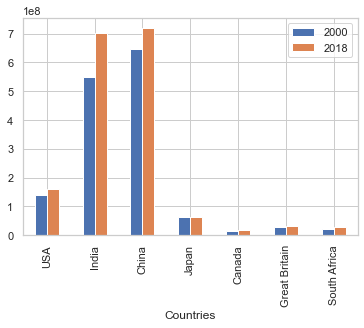

In [46]:
plt.figure(figsize=(7, 5))
# plot the chart using matplotlib.pyplot library
df_both_years.plot(kind='bar',x='Countries',y=[2000, 2018])

India and China have the biggest population in both years, as can be seen. However, India's population growth in 2018 was higher than China's, bringing their populations closer together. Canada has the smallest population of all the countries, with only a slight increase. One remarkable finding for Japan is that the population is the same in both 2000 and 2018, indicating that the country has effective population control techniques.

### Average Birth Rate and Death Rate for countries across all the years



In [47]:
def group_df(feature):
    # create a new dataframe
    df_grouped=pd.DataFrame()

    # find average for each country
    df_grouped['Avg. ' + feature]=combined_df.groupby('Country')[feature].mean()

    # set the index as a column - countries
    df_grouped['Country']=df_grouped.index

    # drop the index
    df_grouped.reset_index(drop=True, inplace=True)

    # sort the rows based of Avg Birth rate
    df_grouped.sort_values('Avg. '+feature, inplace=True, ascending=False)

    print("Avg. " + feature)
    display(df_grouped)
    
    return df_grouped

def plot_bar(df, x_feature, y_feature):
    # bar plot
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    ax = sns.barplot(
        data= df,
        x= x_feature,
        y= "Avg. " + y_feature)

Avg. Birth Rate


,Avg. Birth Rate,Country
3,31.1,India
5,30.6,South Africa
1,20.5,China
6,15.6,USA
0,14.6,Canada
2,13.6,Great Britain
4,12.3,Japan


Avg. Death Rate


,Avg. Death Rate,Country
3,12.2,India
5,11.9,South Africa
2,10.9,Great Britain
6,8.7,USA
1,7.6,China
4,7.5,Japan
0,7.2,Canada


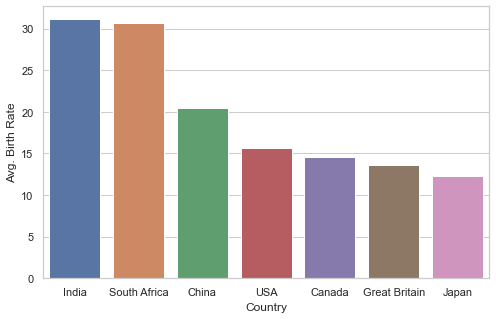

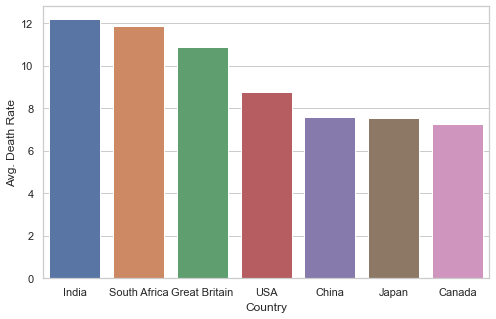

In [48]:
df_birth=group_df('Birth Rate')
plot_bar(df_birth, 'Country', 'Birth Rate')

print("========================================================")
df_death=group_df('Death Rate')
plot_bar(df_death, 'Country', 'Death Rate')

We can see from the above two plots that India has the highest average birth and death rates, which is interesting given that it had the second greatest population in 2018. The trend in South Africa is similar, which is unexpected given the country's small population. China's birth rate is higher than its death rate, resulting in the world's largest population. The death rate in the United Kingdom is substantially greater than the average birth rate, resulting in a small population

### GDP for all countries in the last 10 years


Few records from the Dataframe containing Year, GDP and Country:


,Year,GDP in USD,Country
0,2018,"2,701,111,782,775.0",India
1,2017,"2,651,472,946,374.9",India
2,2016,"2,294,797,980,509.0",India
3,2015,"2,103,587,813,812.8",India
4,2014,"2,039,127,446,298.6",India


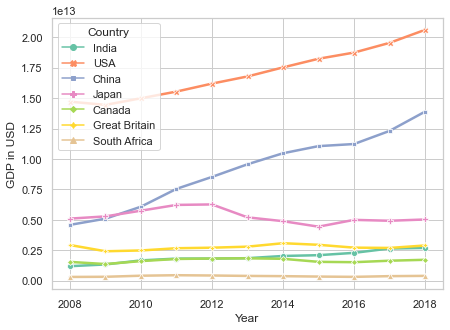

In [49]:
# function to to form a dataframe with Year, GDP and Country
def extract_columns(df_cleaned):
    df=pd.DataFrame()
    # pick data for the recent 10 years, note that the data sorted in descending order of year
    df['Year']=df_cleaned.loc[:10, 'Year']
    df['GDP in USD']=df_cleaned.loc[:10, 'GDP in USD']
    df['Country']=df_cleaned.loc[:10, 'Country']
    return df

# function to fetch a single dataframe with 3 features from each country
def form_gdp_df():
    # function call to extract_columns()
    indf=extract_columns(df_cleaned_in)
    usdf=extract_columns(df_cleaned_us)
    cndf=extract_columns(df_cleaned_cn)
    jpdf=extract_columns(df_cleaned_jp)
    cadf=extract_columns(df_cleaned_ca)
    gbdf=extract_columns(df_cleaned_gb)
    zadf=extract_columns(df_cleaned_za)
    # combine the 7 dfs into a single df with 3 columns
    # we ignore the original index
    gdp_df=pd.concat([indf, usdf, cndf, jpdf, cadf, gbdf, zadf], ignore_index=True)
    return gdp_df

# get the combined DF
gdp_df=form_gdp_df()

print("Few records from the Dataframe containing Year, GDP and Country:")
display(gdp_df.head())

# set figure size
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
# plot using seaborn library
ax=sns.lineplot(x='Year', y='GDP in USD', hue='Country', style="Country",palette="Set2", markers=True, dashes=False, data=gdp_df, linewidth=2.5)

A line plot clearly depicts trends over time and can also be used to compare the patterns of several categories. We can see that the United States has the greatest GDP of all countries, which has been consistent over time. China's GDP was low in 2008 and has increased significantly since then, owing to their growth in numerous industries such as manufacturing; but, in comparison to the United States, it is still quite low.
 
The GDP of Japan shows a modest increase up until 2012, which could be attributable to Japan's growth plan, which was implemented to lift the country out of deflation, but then it drops.


### Electric Power Consumption vs Population for India and China


Few records from the selected features: 


,Male Population,Electric Power Consumption(kWH per capita),Country
0,"703,055,580.0",335.2,India
1,"695,880,522.0",335.2,India
2,"688,604,687.0",335.2,India
3,"681,223,332.0",335.2,India
4,"673,747,770.0",804.5,India


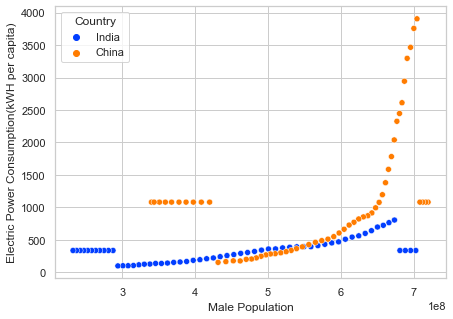

In [50]:
# function to extract specific columns from the DFs for India and China
def form_in_cn_df():
    # for India
    indf=df_cleaned_in[['Male Population', 'Electric Power Consumption(kWH per capita)', 'Country']]
    # for China
    cndf=df_cleaned_cn[['Male Population', 'Electric Power Consumption(kWH per capita)', 'Country']]
    # combine the two dataframes
    in_cn_df=pd.concat([indf, cndf])
    return in_cn_df

# get the desired data
in_cn_df=form_in_cn_df()
print("Few records from the selected features: ")
display(in_cn_df.head())

# scatter plot
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")
ax=sns.scatterplot(x='Male Population', y='Electric Power Consumption(kWH per capita)', hue='Country', palette="bright", data=in_cn_df)

It is evident from the accompanying graph that as the population grows, so will the need for electricity. The dramatic increase in China's electric power consumption demonstrates this. There has been a gradual growth in consumption in India as the population has grown. The mean consumption is indicated by the constant numbers in both lines.

### Total Population vs Electric Power consumption for Canada upto 2015

First few records of the data: 


,Electric Power Consumption(kWH per capita),Total Population,Year
3,"13,266.0","35,702,908.0",2015
4,"15,588.5","35,437,435.0",2014
5,"15,750.8","35,082,954.0",2013
6,"15,336.6","34,714,222.0",2012
7,"15,644.5","34,339,328.0",2011


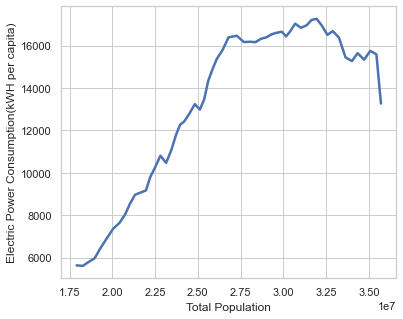

In [51]:
# read the columns from the df for Canada
df=df_cleaned_ca.loc[3:, ['Electric Power Consumption(kWH per capita)','Total Population', 'Year']]

print("First few records of the data: ")
display(df.head())

# line plot
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.lineplot(x='Total Population', y='Electric Power Consumption(kWH per capita)', palette="colorblind",data=df, linewidth=2.5)

We can see from the graph above that Canada's electric power usage has risen in lockstep with the country's population growth. However, after a certain point, it remained constant and then decreased. Despite having the smallest population, Canada has the highest electric power usage, which may be attributable to the country's unusually cold climate.

### Variation in different Energy Consumption over the years for Russia

For this analysis, I have chosen the energy consumption data for Russia over the years upto 2010 and plotted a multi-line chart to observe the trend.

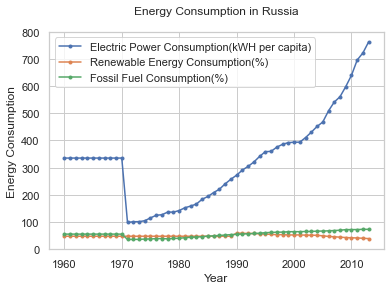

In [52]:
# Pick the columns Year, and 3 different power consumptions from the dataframe for russia
plt.plot(df_cleaned_in.loc[5:, ['Year']],df_cleaned_in.loc[5:, ['Electric Power Consumption(kWH per capita)']],'.-')
plt.plot(df_cleaned_in.loc[5:, ['Year']],df_cleaned_in.loc[5:, ['Renewable Energy Consumption (%)']],'.-')
plt.plot(df_cleaned_in.loc[5:, ['Year']],df_cleaned_in.loc[5:, ['Fossil Fuel Consumption (%)']],'.-')

plt.legend(['Electric Power Consumption(kWH per capita)', 'Renewable Energy Consumption(%)', 'Fossil Fuel Consumption(%)'], loc='best')
plt.title("Energy Consumption in Russia\n")
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()

From this plot, it can be observed that The Electric power consumption has increased significantly over time. On the other hand, the consumption for Fossil Fuels and Renewable Energy is low as compared to electrical energy. Fossil Fuel consumption seems to have increased between 2000 and 2010.

### Employment in the Agricultural sector in Countries in the year 2015


Employment in Agriculture data for 2015: 


,Employment in Agriculture(%),Countries
1,45.3,India
2,28.6,China
6,5.6,South Africa
3,3.6,Japan
4,1.6,Canada
0,1.4,USA
5,1.1,Great Britain


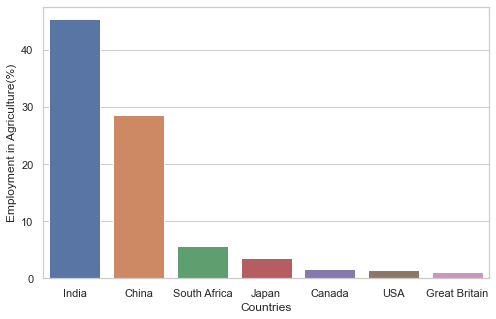

In [53]:
# get the list of countries
list_countries=COUNTRY_LIST

df_agr_emp=pd.DataFrame()

# iterate over the dataframe
for i,df in enumerate(list_cleaned_df):
    # store the % Employment in Agriculture for each country 
    df_agr_emp[list_countries[i]]=df[df['Year'] == 2015]["Employment in Agriculture(%)"]

# take the transpose
df_agr_emp=df_agr_emp.T

pd.options.display.float_format = '{:,.1f}'.format  # set other global format

# since we took a transpose to get countries as the rows, the row index shows the names of the countries.
# Add it as a column in the DF
df_agr_emp['Countries'] = df_agr_emp.index
# drop the index
df_agr_emp.reset_index(drop=True, inplace=True)
# The index for Employment % in agriculture needs to be renamed to the actual column name
df_agr_emp=df_agr_emp.rename(columns={3: "Employment in Agriculture(%)"})

# sort the rows based in decreasing order of % Employment
df_agr_emp.sort_values('Employment in Agriculture(%)', inplace=True, ascending=False)

print("Employment in Agriculture data for 2015: ")
display(df_agr_emp)

# bar plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(
    data= df_agr_emp,
    x= 'Countries',
    y= 'Employment in Agriculture(%)')

From the graph above, India has the biggest percentage of people employed in agriculture out of all countries. This reflects the fact that India is a predominantly agricultural country with numerous food products grown on its soil. India is followed by China. Due to a scarcity of arable land in China, farming is particularly labor intensive. As a result, agriculture employs many people. Agriculture employs a very small percentage of the population in the remainder of the world. The United Kingdom has the lowest percentage in agriculture, which is since it produces less than 60% of the food consumed.

# Summary and Conclusion

A number of features in the World Bank dataset can be leveraged to build intriguing patterns in the data. 
Population counts, birth rate, and death rate were all analysed, and several fascinating patterns about how the birth rate and death rate affect the overall population were discovered.
Similarly, it was discovered that India has the highest percentage of employment in agriculture, depending on the nature of the countries. Other studies of the relationship between power consumption and total population found that electrical power consumption is the highest in most countries when compared to their population.
